In [1]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF


2023-12-03 10:20:52.454621: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 10:20:52.481623: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 10:20:52.702711: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 10:20:52.704777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 10:20:53.667587: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 



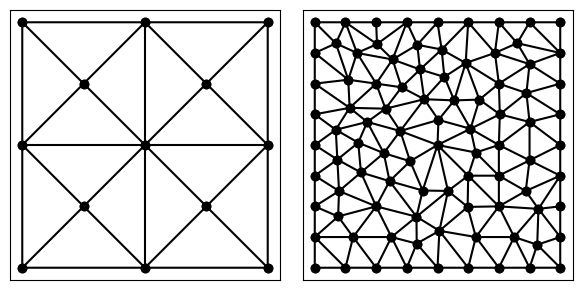

In [8]:
base_res = 0.1
new_res = 0.01

domain = [(0,0), (1, 0),(0, 1), (1,1)]

base_mesh = tr.triangulate({'vertices': domain}, f"qa{base_res}")
refined_mesh = tr.triangulate(base_mesh, f"q30ra{new_res}")

tr.compare(plt,base_mesh,refined_mesh)

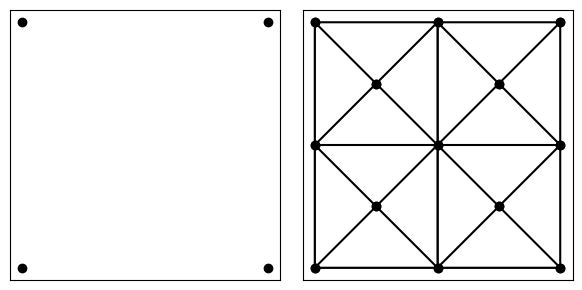

In [2]:
initializer=tf.keras.initializers.GlorotUniform(seed=50)
domain=((0,0),(1,0),(1,1),(0,1))

mesh=generate_mesh(domain,0.1)

dict_keys(['vertices', 'vertex_markers', 'triangles'])


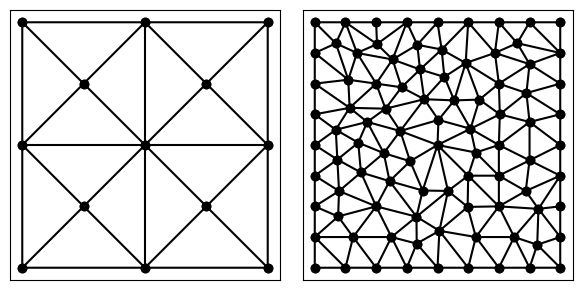

In [4]:


domain = [(0,0), (1, 0),(0, 1), (1,1)]

B = tr.triangulate({'vertices': domain}, "qa0.1")
print(B.keys())

C = tr.triangulate(B, "q30ra0.01")

tr.compare(plt,B,C)

TypeError: compare() missing 1 required positional argument: 'B'

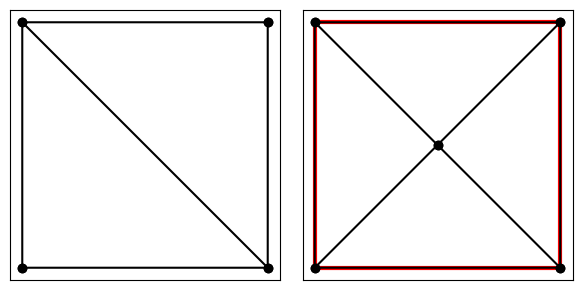

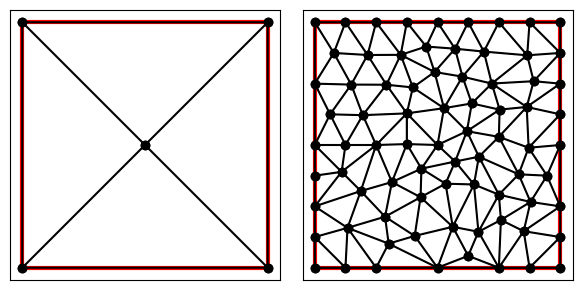

In [34]:


A = dict(vertices = [(0,0), (1, 0),(0, 1), (1,1)])



B = tr.triangulate(A, "qa")



C=tr.triangulate(B,"pqra0.25")

D=tr.triangulate(C,"peqra0.0125")


tr.compare(plt,B,C)

tr.compare(plt,C,D)

C.keys()

D['segment_markers']

point = (0.5, 0.5)
triangle_indices = tr.compare(C, [point])

In [ ]:
tr.

In [5]:
import numpy as np
import triangle as tr

# Save the mesh to a file (in Triangle's .node and .ele format)
with open('output.1.node', 'w') as node_file:
    node_file.write(f"{len(B['vertices'])} 2 0 0\n")
    np.savetxt(node_file, B['vertices'], fmt='%d %g %g')

with open('output.1.ele', 'w') as ele_file:
    ele_file.write(f"{len(B['triangles'])} 3 0\n")
    np.savetxt(ele_file, B['triangles'] + 1, fmt='%d %d %d %d')


ValueError: fmt has wrong number of % formats:  %d %g %g

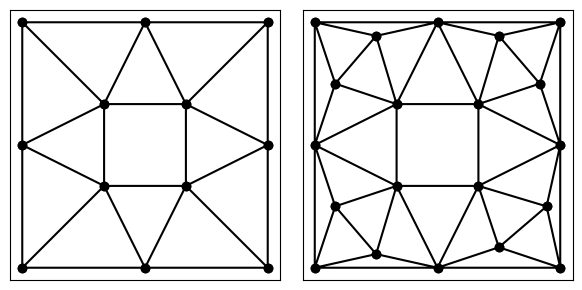

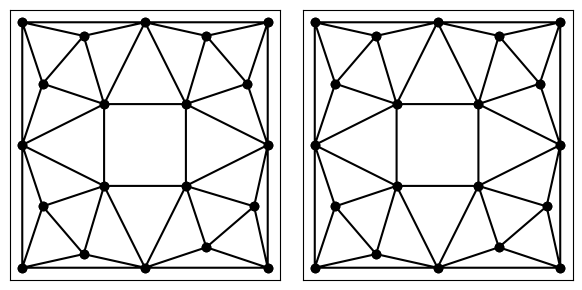

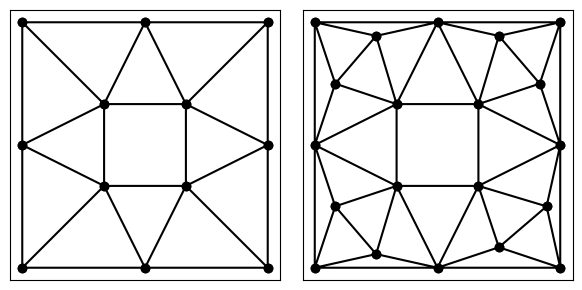

In [66]:

a1=tr.load('', 'output.1')
a2=tr.load('.', 'output.2')
a3=tr.load('.', 'output.3')


tr.compare(plt,a1,a2)
tr.compare(plt,a2,a3)
tr.compare(plt,a1,a3)


In [17]:
plt.scatter(a2['vertices'][:,0],a2['vertices'][:,1],alpha=0.2)
plt.triplot(a3['vertices'][:,0],a3['vertices'][:,1],marker='*',linewidths=0.3)

NameError: name 'a2' is not defined

In [45]:
def export_to_node_file(filename, mesh):
    vertices=mesh['vertices']
    with open(filename, 'w') as f:
        f.write(f"{len(vertices)}  2  0  1\n")
        for i, vertex in enumerate(vertices):
            f.write(f"  {i + 1}  {vertex[0]}  {vertex[1]}    {mesh['vertex_markers'][i,0]}\n")

def export_to_ele_file(filename, mesh):
    triangles=mesh['triangles']
    with open(filename, 'w') as f:
        f.write(f"{len(triangles)}  3  0\n")
        for i, triangle in enumerate(triangles):
            f.write(f"  {i + 1}     {triangle[0]}    {triangle[1]}    {triangle[2]}\n")

In [68]:
export_to_node_file("output.4.node", a1)
export_to_ele_file("output.4.ele", a1)

ValueError: triangles are indices into the points and must be in the range 0 <= i < 12 but found value -1

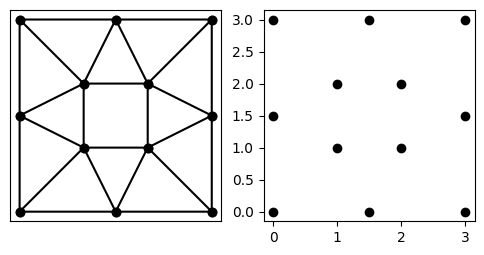

In [2]:
def is_point_inside_triangle(point, triangle_vertices):
    x, y = point
    x1, y1 = triangle_vertices[0]
    x2, y2 = triangle_vertices[1]
    x3, y3 = triangle_vertices[2]

    # Calculate barycentric coordinates
    detT = (y2 - y3) * (x1 - x3) + (x3 - x2) * (y1 - y3)
    alpha = ((y2 - y3) * (x - x3) + (x3 - x2) * (y - y3)) / detT
    beta = ((y3 - y1) * (x - x3) + (x1 - x3) * (y - y3)) / detT
    gamma = 1 - alpha - beta

    # Check if the point is inside the triangle
    if 0 <= alpha <= 1 and 0 <= beta <= 1 and 0 <= gamma <= 1:
        return True
    else:
        return False

# Example usage


triangle_vertices = [(0, 0), (1, 0), (0, 1)]
point_to_check = (0.2, 0.2)

if is_point_inside_triangle(point_to_check, triangle_vertices):
    print("Point is inside the triangle.")
else:
    print("Point is outside the triangle.")

Point is inside the triangle.


In [149]:

def area(x1, y1, x2, y2, x3, y3):
 
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)))



def isInside(point, triangle_vertices):
    x, y = point
    x1, y1 = triangle_vertices[0]
    x2, y2 = triangle_vertices[1]
    x3, y3 = triangle_vertices[2]

	# Calculate area of triangle ABC
    A = area(x1, y1, x2, y2, x3, y3)

	# Calculate area of triangle PBC 
    A1 = area(x, y, x2, y2, x3, y3)
	
	# Calculate area of triangle PAC 
    A2 = area(x1, y1, x, y, x3, y3)
	
	# Calculate area of triangle PAB 
    A3 = area(x1, y1, x2, y2, x, y)
	
	# Check if sum of A1, A2 and A3 
	# is same as A

    
    if np.isclose(A,A1+A2+A3,0.0000000001):
        return True 
    else:
        print(A1+A2+A3,A)
        return False
    




In [9]:
import triangle as tr

domain = [(0,0), (1, 0), (0, 1), (1,1)]

base_mesh = tr.triangulate({'vertices': domain}, f"q30ea{0.05}")

# tr.compare(plt, base_mesh, base_mesh)

base_mesh['segments'] = base_mesh['edges']
base_mesh['segment_markers'] = base_mesh['edge_markers']

# guess = tr.triangulate(base_mesh, 'p')

guess_refined = tr.triangulate(base_mesh, 'rpa0.005')

tr.compare(plt, base_mesh, guess_refined)

print(len(base_mesh['segment_markers']))
print(len(guess_refined['segment_markers']))


print(base_mesh.keys())
print(guess_refined.keys())

NameError: name 'plt' is not defined

In [7]:
temp=[i for i in range(5)]
print(temp)

for l in reversed(temp):
    print('iter : ',l)
    if (l==2) or (l==3):
        print('removing')
        temp.remove(l)
    print(l)    

print(temp)

[0, 1, 2, 3, 4]
iter :  4
4
iter :  3
removing
3
iter :  2
removing
2
iter :  1
1
iter :  0
0
[0, 1, 4]


In [4]:
temp=[i for i in range(5)]
print(temp)

for l in temp.reverse():
    print('iter : ',l)
    if (l==2) or (l==3):
        print('removing')
        temp.remove(l)
    print(l)    

print(temp)


[0, 1, 2, 3, 4]


TypeError: 'NoneType' object is not iterable

In [1]:
temp=[i for i in range(5)]
jacob=temp.copy()
print(temp)

for l in temp:
    print('iter : ',l)
    if (l==2) or (l==3):
        print('removing')
        jacob.remove(l)
    print(l)    

print(temp)
print(jacob)



[0, 1, 2, 3, 4]
iter :  0
0
iter :  1
1
iter :  2
removing
2
iter :  3
removing
3
iter :  4
4
[0, 1, 2, 3, 4]
[0, 1, 4]


In [151]:
triangles=[i for i in range(len(guess_refined['triangles']))]

print(triangles)

jacob=triangles.copy()



zone=np.zeros((len(triangles)))

print(triangles)
print(len(triangles))


for index in range(len(base_mesh['triangles'])):


    triangle_vertices=base_mesh['vertices'][base_mesh['triangles'][index]]



    counter=0

    for elem in triangles:
        center=np.sum(guess_refined['vertices'][guess_refined['triangles'][elem]],axis=0)/3.0
        if isInside(center,triangle_vertices)==True:
            zone[elem]=index
            jacob.remove(elem)
            counter=counter+1
    print(counter)


    print(jacob)
    print(len(jacob))

        

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [41]:
Xmin=min(guess_refined['vertices'][:,0])
print(Xmin)

0.0


[[0.46350818 0.11412911]
 [0.5786746  0.23560434]
 [0.46292718 0.19418312]
 [0.4361659  0.25554655]
 [0.41200294 0.22138871]
 [0.48143392 0.15904228]
 [0.51089398 0.05573345]
 [0.50740066 0.0977438 ]
 [0.56335017 0.16558544]
 [0.54362065 0.21612859]
 [0.5253264  0.14265697]
 [0.48709014 0.22834096]]


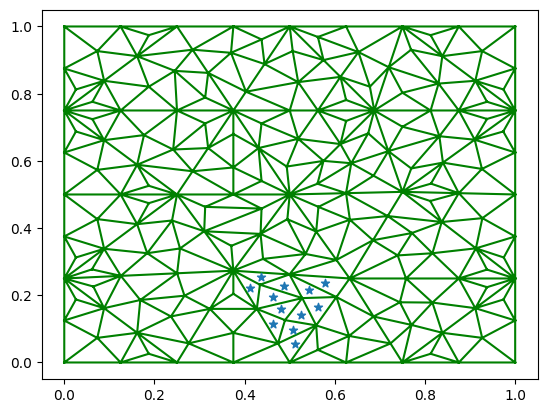

In [153]:
triangles=[i for i in range(len(guess_refined['triangles']))]

t=[]

for elem in triangles:
    center=np.sum(guess_refined['vertices'][guess_refined['triangles'][elem]],axis=0)/3.0
    if zone[elem]==1:
        t.append(center)

t=np.array(t)
print(t)

plt.triplot(guess_refined['vertices'][:,0],guess_refined['vertices'][:,1],guess_refined['triangles'],color='g')
plt.scatter(t[:,0],t[:,1],marker='*')

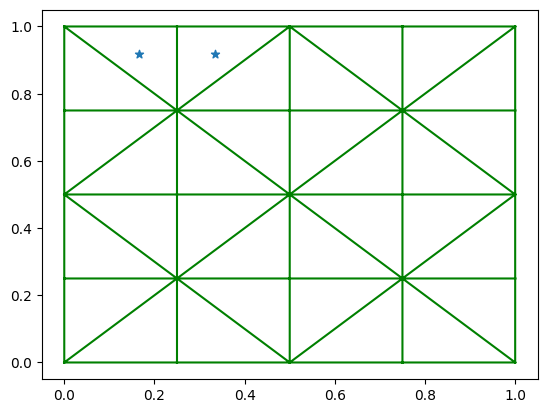